# Parse and inspect single .cnv files (pre-binning)

Quick look at a `.cnv` file before bining in order to e.g diagnose problems related to SBE flagging the wrong parts of the profile.

A typical issue is that data from the pre-profile soak ends up in the binned profile. This script can be used to quickly diagnose similar issues.

> *Note*: (Not actually *doing* anything here, just inspecting). 

In [6]:
import matplotlib.pyplot as plt
# Load modules from the kval library  
from kval.data import ctd
from kval.file import sbe
# Set the matplotlib backend so we can interact with the plots (zoom, click buttons etc)
%matplotlib widget

### Specify the file we want to look at

In [7]:
path_to_file = '../../data/source/cnv_pre_bin/019.cnv' # Replace with the file you want to look at

### Load the file and look at how the profile is picked out

SBE loop editing (or whatever) applies flags for "good data" that is included in binning.

Here: Load the data and set `inspect_plot=True` to produce a plot of pressure vs scan count, showing which points are flagged as good (`flag=0` in the `.cnv` file + identified as downcast by `kval`).

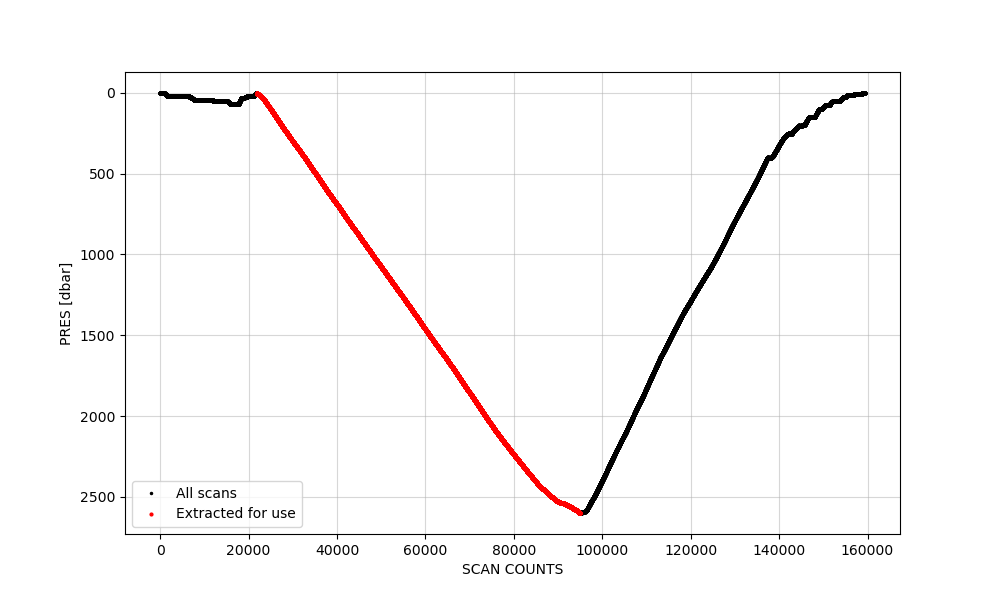

Text(0.5, 1.0, '019.CNV')

In [9]:
d = sbe.read_cnv(path_to_file, inspect_plot=True) # Note: By default, this function automatically removes the upcast (data after max pressure) 
cnv_file_name = d.source_files[d.source_files.rfind(' -> ')+4:]
plt.gca().set_title(cnv_file_name)

## Look at the SBE processing steps
Print a human-redable list of steps applied in processing.

> *Note*: This is basically a parsed version of the processing string in the .cnv header. Errors/inaccuracies can occur..

In [10]:
print(d.SBE_processing)

SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file header):
1. Raw data read from 019.HEX, FS2022_CTD.XMLCON.
2. Oxygen hysteresis correction applied.
3. Oxygen tau correction applied.
4. Low-pass filter with time constant 0.03 seconds applied to: sbox0Mm/Kg.
5. Low-pass filter with time constant 0.15 seconds applied to: prDM wetCDOM wetCDOM1.
6. Cell thermal mass correction applied to conductivity from sensors: [primary, secondary]. 
   > Parameters ALPHA: [0.0300, 0.0300], TAU: [7.0000, 7.0000].
7. Loop editing applied.
   > Parameters:
     Minimum velocity (ms-1): 0.200. 
     Soak depth range (m): 15.0 to 85 (Deck pressure offset: No).
   > Bad scans excluded. 
8. Derived EOS-8 salinity and other variables.


## Quick diagnostics plots

### Profile plot

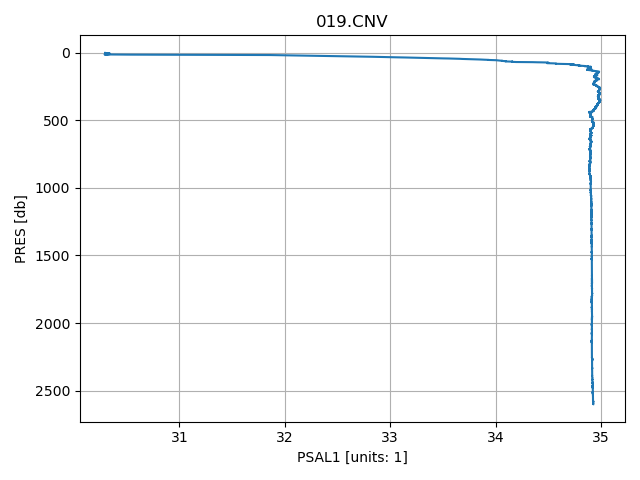

In [11]:
variable = 'PSAL1'
fig, ax = plt.subplots()
ax.plot(d[variable], d.PRES)
ax.invert_yaxis()
ax.set_ylabel('PRES [db]')
ax.set_xlabel(f'{variable} [units: {d[variable].units}]')
ax.grid()
ax.set_title(cnv_file_name)
plt.tight_layout()

### Time plot

Quick plot in time.

In [12]:
# Load the data without applying any flags or extracting downcast
d_noflag = sbe.read_cnv(path_to_file, apply_flags=False, profile='none')

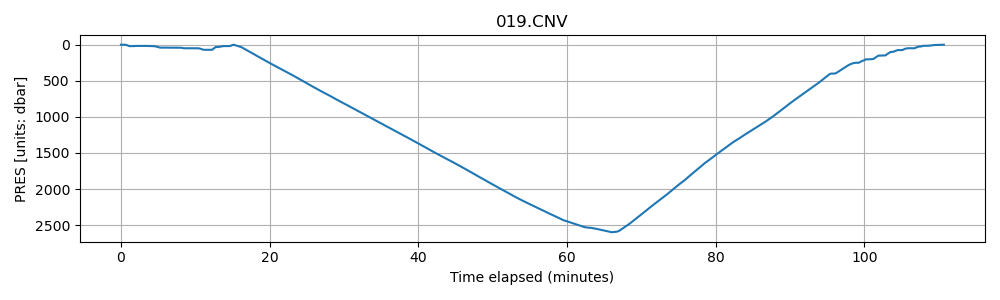

In [13]:
variable = 'PRES'

minutes_elapsed = (d_noflag.TIME_SAMPLE-d_noflag.TIME_SAMPLE[0])*1440
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(minutes_elapsed, d_noflag[variable], )
ax.invert_yaxis()
ax.set_xlabel('Time elapsed (minutes)')
ax.set_ylabel(f'{variable} [units: {d[variable].units}]')
ax.grid()
ax.set_title(cnv_file_name)
plt.tight_layout()

In [14]:
plt.close('all')